<a href="https://colab.research.google.com/github/MohannadAshraf14/Preprocess-Classify/blob/main/Personality_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [116]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [117]:
df = pd.read_csv('/content/data - data.csv')
df

,Age,Gender,Education,Introversion Score,Sensing Score,Thinking Score,Judging Score,Interest,Personality
0,21,Female,1,5.89208,2.144395,7.32363,5.462224,Arts,ENTP
1,24,Female,1,2.48366,3.206188,8.06876,3.765012,Unknown,INTP
2,26,Female,1,7.02910,6.469302,4.16472,5.454442,Others,ESFP
3,30,Male,0,5.46525,4.179244,2.82487,5.080477,Sports,ENFJ
4,31,Female,0,3.59804,6.189259,5.31347,3.677984,Others,ISFP
...,...,...,...,...,...,...,...,...,...
43739,26,Male,1,8.88656,5.118399,8.48784,5.331942,Arts,ENTP
43740,29,Male,0,2.71470,6.851956,0.25519,3.623678,Unknown,ISFP
43741,25,Female,0,2.00982,6.544036,6.63911,6.201555,Technology,ISTJ
43742,23,Male,0,7.23553,4.876780,2.41671,4.654016,Arts,ENFP


In [118]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43744 entries, 0 to 43743
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Age                 43744 non-null  int64  
 1   Gender              43744 non-null  object 
 2   Education           43744 non-null  int64  
 3   Introversion Score  43744 non-null  float64
 4   Sensing Score       43744 non-null  float64
 5   Thinking Score      43744 non-null  float64
 6   Judging Score       43744 non-null  float64
 7   Interest            43744 non-null  object 
 8   Personality         43744 non-null  object 
dtypes: float64(4), int64(2), object(3)
memory usage: 3.0+ MB


In [119]:
df['Interest'] = df['Interest'].replace('Unknown', np.nan)

# Check nulls

In [120]:
df.isna().sum()*100/len(df)

,0
Age,0.000000
Gender,0.000000
Education,0.000000
Introversion Score,0.000000
Sensing Score,0.000000
Thinking Score,0.000000
Judging Score,0.000000
Interest,35.195684
Personality,0.000000


In [121]:
df.dropna(inplace=True)

# Check duplicates

In [122]:
df.duplicated().sum()*100/len(df)

np.float64(2.5363341329194298)

In [123]:
df.drop_duplicates(inplace=True)

In [124]:
df.shape

(27629, 9)

# Check outliers

In [125]:
df.describe()

,Age,Education,Introversion Score,Sensing Score,Thinking Score,Judging Score
count,27629.000000,27629.000000,27629.000000,27629.000000,27629.000000,27629.000000
mean,27.395961,0.226103,4.660105,5.749998,5.353110,5.371276
std,4.893658,0.418314,2.901106,1.251983,2.895158,1.423753
min,18.000000,0.000000,0.000150,0.000000,0.000750,0.000000
25%,24.000000,0.000000,2.133270,4.915009,2.830580,4.538274
50%,27.000000,0.000000,4.389760,6.144769,5.665060,5.678989
75%,30.000000,0.000000,7.154370,6.603023,7.842170,6.371993
max,52.000000,1.000000,9.999920,9.803837,9.999770,9.730436


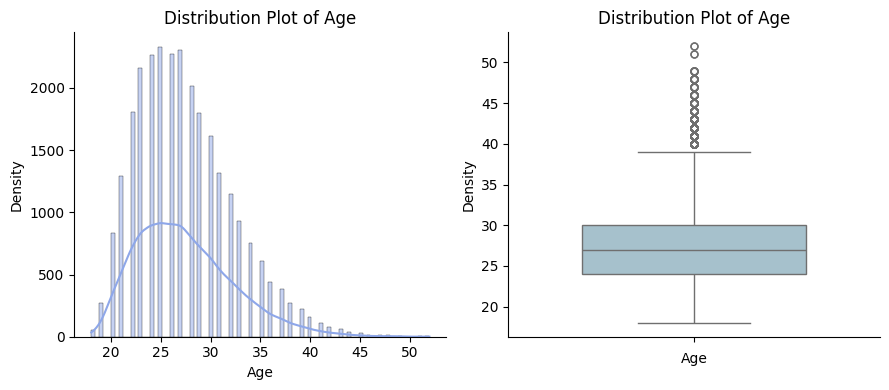

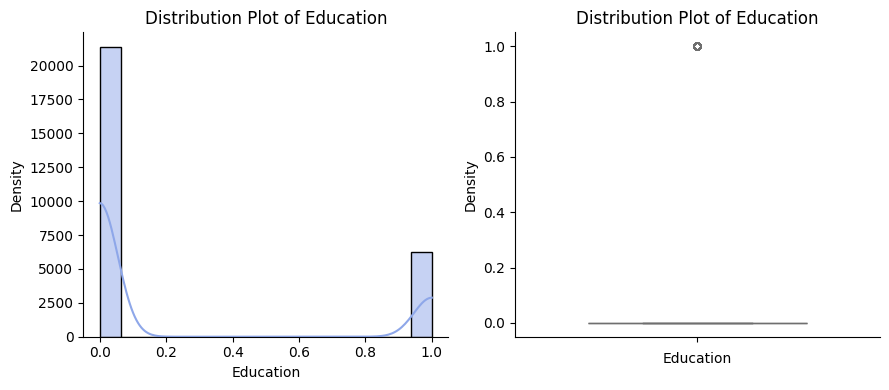

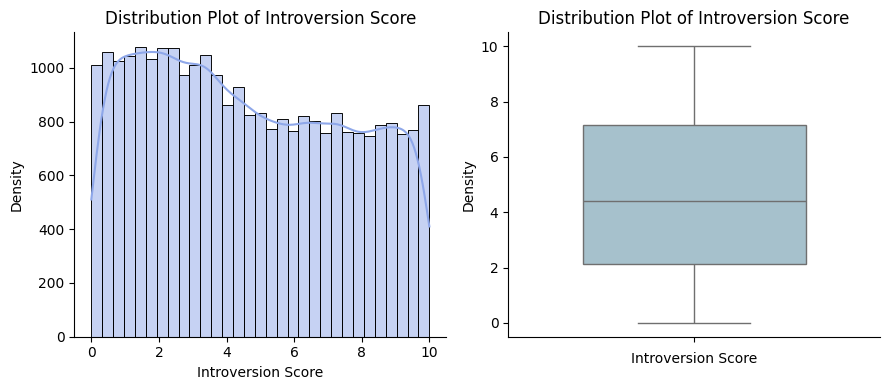

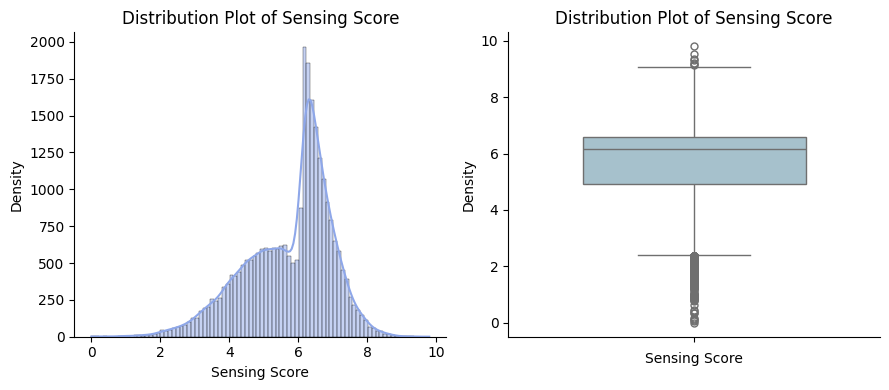

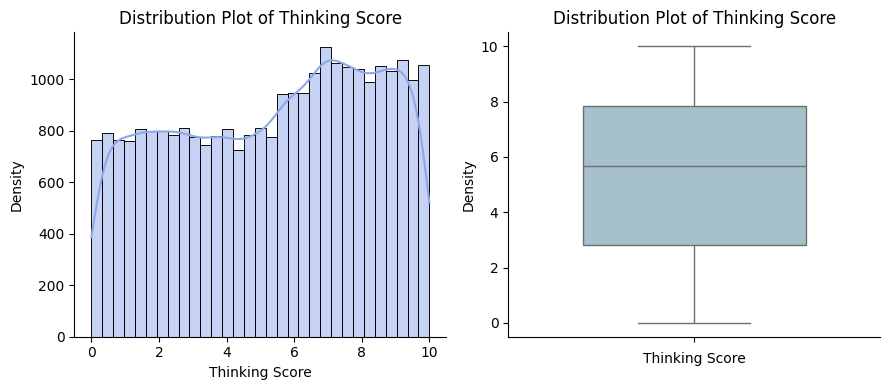

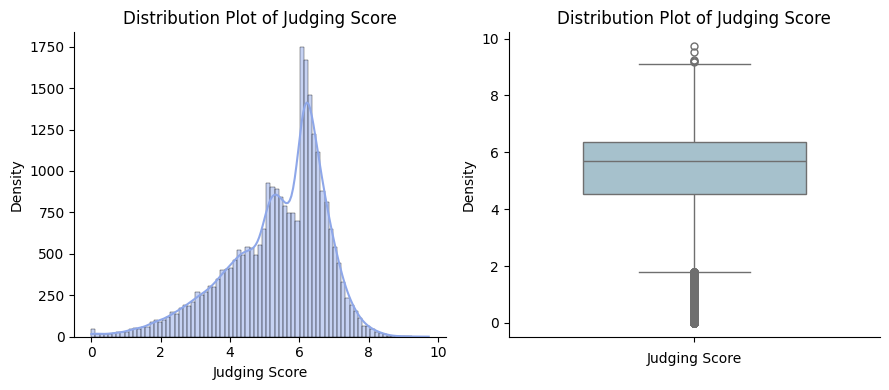

In [126]:
numerical_col = df.select_dtypes(include='number').columns
for i in range(len(numerical_col)):
    plt.figure(figsize=(9,4))
    plt.subplot(1, 2, 1)
    sns.histplot(df[numerical_col[i]],kde=True,color='#8EA7E9')
    plt.xlabel(numerical_col[i])
    plt.ylabel('Density')
    plt.title(f'Distribution Plot of {numerical_col[i]}')
    sns.despine()
    plt.subplot(1, 2, 2)
    sns.boxplot(df[numerical_col[i]],color='#A0C3D2',width=0.6, fliersize=5)
    plt.xlabel(numerical_col[i])
    plt.ylabel('Density')
    plt.title(f'Distribution Plot of {numerical_col[i]}')
    sns.despine()
    plt.tight_layout()
plt.tight_layout()
plt.show()

In [127]:
def outlier(df,col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    outliers = outliers.drop_duplicates()

    return outliers

In [128]:
numerical_col = df.select_dtypes(include='number').columns
for i in numerical_col:
  if df[i].nunique() > 2:
    print(f'Outliers in {i} : {outlier(df,i).shape[0]}')

Outliers in Age : 526
Outliers in Introversion Score : 0
Outliers in Sensing Score : 294
Outliers in Thinking Score : 0
Outliers in Judging Score : 555


In [129]:
outsample_age = outlier(df,'Age').sample(frac=0.3)
outsample_sens = outlier(df,'Sensing Score').sample(frac=0.3)
outsample_judje = outlier(df,'Judging Score').sample(frac=0.3)

In [130]:
all_out = set()
for i in numerical_col:
  if df[i].nunique() > 16:
    outliers_df = outlier(df, i)
    if not outliers_df.empty:
        all_out.update(outliers_df.index)

df.drop(list(all_out), inplace=True)

In [131]:
df = pd.concat([df,outsample_age])
df = pd.concat([df,outsample_sens])
df = pd.concat([df,outsample_judje])

In [132]:
df.shape

(26687, 9)

# Encoding

In [133]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Gender'] = le.fit_transform(df['Gender'])
df['Interest'] = le.fit_transform(df['Interest'])
df['Personality'] = le.fit_transform(df['Personality'])

# Split data to x & y

In [134]:
x = df.drop('Personality',axis=1)
y = df['Personality']

# Check correlation

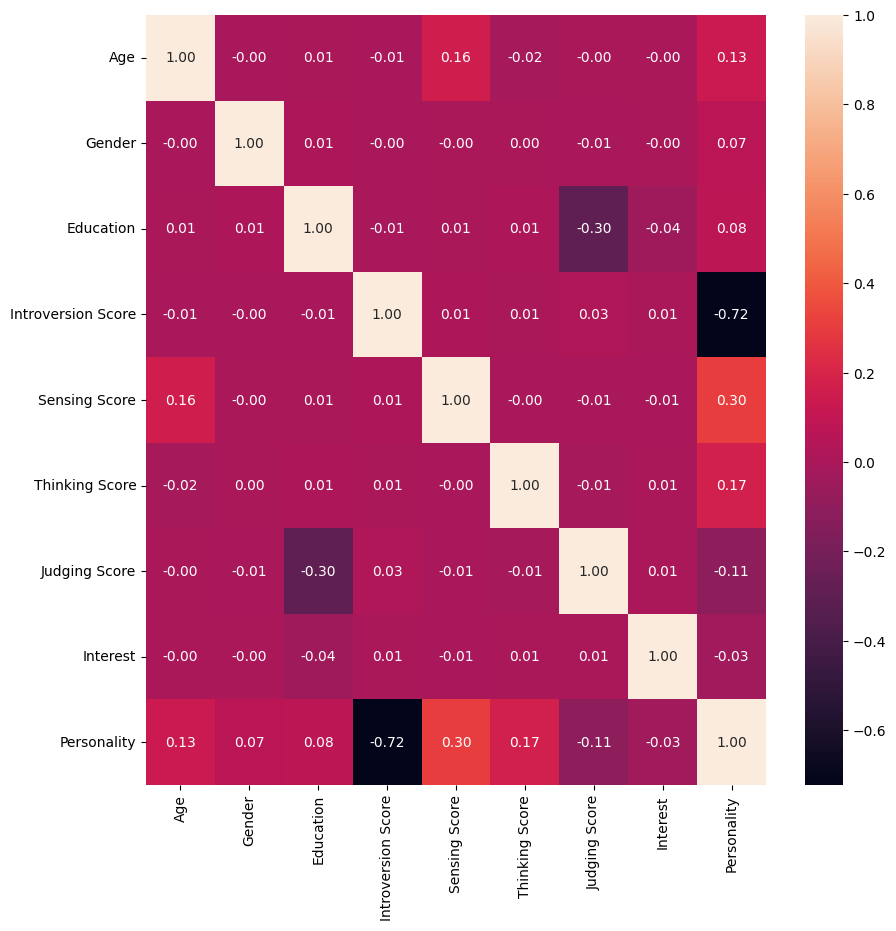

In [135]:
plt.figure(figsize=(10,10))
sns.heatmap( annot=True, fmt='.2f', data=df.corr())
plt.show()

# Scaling

In [136]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x = sc.fit_transform(x)

# Split data to train & test

In [137]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=44)
print('x_train shape : ',x_train.shape)
print('x_test shape : ',x_test.shape)
print('y_train shape : ',y_train.shape)
print('y_test shape : ',y_test.shape)

x_train shape :  (21349, 8)
x_test shape :  (5338, 8)
y_train shape :  (21349,)
y_test shape :  (5338,)


# Multinominal Logistic Regression

In [138]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(multi_class='multinomial',solver='lbfgs')
model = lr.fit(x_train,y_train)
y_pred = model.predict(x_test)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


In [139]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.82      0.78      0.80       377
           1       0.83      0.73      0.77       333
           2       0.85      0.76      0.80       406
           3       0.79      0.77      0.78       288
           4       0.78      0.85      0.81       339
           5       0.80      0.77      0.78       308
           6       0.78      0.85      0.81       387
           7       0.78      0.81      0.79       344
           8       0.81      0.76      0.78       369
           9       0.76      0.79      0.77       294
          10       0.80      0.80      0.80       379
          11       0.80      0.73      0.76       336
          12       0.78      0.87      0.82       354
          13       0.77      0.81      0.79       280
          14       0.76      0.79      0.78       224
          15       0.79      0.82      0.80       320

    accuracy                           0.79      5338
   macro avg       0.79   

#KNN

In [140]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
model = knn.fit(x_train,y_train)
y_pred = model.predict(x_test)

In [141]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.79      0.77      0.78       377
           1       0.85      0.61      0.71       333
           2       0.79      0.76      0.77       406
           3       0.78      0.65      0.71       288
           4       0.75      0.84      0.79       339
           5       0.71      0.71      0.71       308
           6       0.75      0.87      0.80       387
           7       0.73      0.78      0.76       344
           8       0.79      0.76      0.77       369
           9       0.75      0.67      0.71       294
          10       0.75      0.82      0.78       379
          11       0.80      0.67      0.73       336
          12       0.73      0.87      0.80       354
          13       0.69      0.74      0.71       280
          14       0.72      0.75      0.73       224
          15       0.76      0.75      0.75       320

    accuracy                           0.76      5338
   macro avg       0.76   

# SVM

In [142]:
from sklearn.svm import SVC

svm = SVC()
model = svm.fit(x_train,y_train)
y_pred = model.predict(x_test)

In [143]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.85      0.81      0.83       377
           1       0.92      0.72      0.81       333
           2       0.88      0.84      0.86       406
           3       0.89      0.80      0.84       288
           4       0.81      0.88      0.84       339
           5       0.86      0.78      0.82       308
           6       0.80      0.92      0.85       387
           7       0.84      0.85      0.84       344
           8       0.86      0.83      0.84       369
           9       0.85      0.78      0.82       294
          10       0.82      0.87      0.84       379
          11       0.86      0.80      0.83       336
          12       0.79      0.93      0.86       354
          13       0.79      0.85      0.82       280
          14       0.78      0.87      0.82       224
          15       0.83      0.84      0.84       320

    accuracy                           0.84      5338
   macro avg       0.84   

# Rondom Forest (by grid search cv)

In [110]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=44)
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 5, 10],
    'criterion': ['gini', 'entropy'],
    'random_state': [44]
}

rf = RandomForestClassifier()
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, n_jobs=-1)
model = grid_search.fit(x_train, y_train)
y_pred = model.predict(x_test)

In [111]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.93      0.89      0.91       376
           1       0.94      0.86      0.90       333
           2       0.94      0.84      0.89       410
           3       0.91      0.86      0.88       283
           4       0.89      0.92      0.91       340
           5       0.91      0.88      0.89       309
           6       0.89      0.93      0.91       383
           7       0.90      0.93      0.91       347
           8       0.90      0.92      0.91       369
           9       0.87      0.91      0.89       297
          10       0.88      0.92      0.90       377
          11       0.90      0.85      0.88       335
          12       0.91      0.92      0.91       357
          13       0.84      0.93      0.88       278
          14       0.87      0.91      0.89       225
          15       0.86      0.91      0.89       319

    accuracy                           0.90      5338
   macro avg       0.90   

# Dicision Tree (by grid search cv)

In [112]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(random_state=44)
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2,5,10],
    'min_samples_leaf': [1,2,5]
}


grid_search = GridSearchCV(estimator=dt, param_grid=param_grid, cv=5)
model = grid_search.fit(x_train, y_train)
y_pred = model.predict(x_test)

In [113]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.92      0.90      0.91       376
           1       0.91      0.86      0.89       333
           2       0.95      0.85      0.90       410
           3       0.85      0.85      0.85       283
           4       0.87      0.91      0.89       340
           5       0.89      0.85      0.87       309
           6       0.89      0.92      0.90       383
           7       0.90      0.90      0.90       347
           8       0.91      0.90      0.91       369
           9       0.86      0.88      0.87       297
          10       0.90      0.91      0.90       377
          11       0.89      0.83      0.86       335
          12       0.89      0.91      0.90       357
          13       0.81      0.92      0.86       278
          14       0.83      0.89      0.86       225
          15       0.86      0.91      0.89       319

    accuracy                           0.89      5338
   macro avg       0.88   

# XGBoost

In [114]:
from xgboost import XGBClassifier

xgb = XGBClassifier()
model = xgb.fit(x_train,y_train)
y_pred = model.predict(x_test)

In [115]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.93      0.89      0.91       376
           1       0.94      0.87      0.90       333
           2       0.95      0.86      0.90       410
           3       0.89      0.87      0.88       283
           4       0.89      0.90      0.89       340
           5       0.91      0.88      0.89       309
           6       0.90      0.94      0.92       383
           7       0.88      0.90      0.89       347
           8       0.90      0.92      0.91       369
           9       0.88      0.89      0.88       297
          10       0.89      0.93      0.91       377
          11       0.89      0.87      0.88       335
          12       0.90      0.91      0.90       357
          13       0.84      0.92      0.87       278
          14       0.87      0.88      0.88       225
          15       0.85      0.88      0.86       319

    accuracy                           0.89      5338
   macro avg       0.89   